In [1]:
import tensorflow as tf
import os
import glob

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

2024-03-28 00:33:42.083181: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-28 00:33:43.063037: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-28 00:33:43.947480: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# https://www.gpu-mart.com/blog/6-steps-to-install-gpu-accelerated-tensorflow
tf.test.is_built_with_cuda()

True

In [3]:

tf.config.list_physical_devices('GPU')

2024-03-28 00:33:47.631310: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-28 00:33:48.013283: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


[]

In [4]:
train_images_path_pattern = os.path.join("train", "*", "*.jpg")
train_image_file_paths = glob.glob(train_images_path_pattern)

test_images_path_pattern = os.path.join("test", "*", "*.jpg")
test_image_file_paths = glob.glob(test_images_path_pattern)

train_image_file_paths[:5], test_image_file_paths[:5]

(['train/chihuahua/img_0_62.jpg',
  'train/chihuahua/img_1_879.jpg',
  'train/chihuahua/img_0_6.jpg',
  'train/chihuahua/img_4_859.jpg',
  'train/chihuahua/img_4_719.jpg'],
 ['test/chihuahua/img_3_700.jpg',
  'test/chihuahua/img_2_1043.jpg',
  'test/chihuahua/img_3_53.jpg',
  'test/chihuahua/img_0_343.jpg',
  'test/chihuahua/img_0_871.jpg'])

('train/chihuahua/img_0_1050.jpg', 3, (1937, 2902, 3))

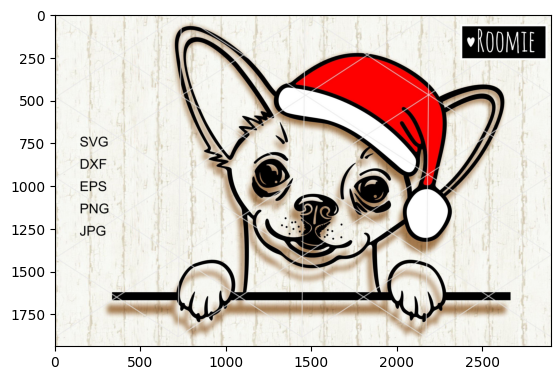

In [5]:
import random

random_image_path = random.choice(train_image_file_paths)

image = mpimg.imread(random_image_path)
plt.show()
plt.imshow(image)
random_image_path, image.ndim, image.shape

In [6]:
img_shapes = []
for i, image_file_path in enumerate(train_image_file_paths):
	image = mpimg.imread(image_file_path)
	img_shapes.append(image.shape + (i,))

img_shapes.sort()

In [7]:
len(img_shapes), img_shapes[-10:], img_shapes[:10]

(4733,
 [(3277, 2500, 3, 2893),
  (3458, 3498, 3, 1767),
  (3692, 3747, 3, 2902),
  (3888, 2592, 3, 2703),
  (4000, 3000, 3, 734),
  (4000, 3000, 3, 1329),
  (4032, 3024, 3, 419),
  (4032, 3024, 3, 1791),
  (4032, 3024, 3, 2623),
  (4032, 3024, 3, 3719)],
 [(129, 389, 3, 385),
  (129, 389, 3, 1992),
  (135, 372, 3, 285),
  (138, 364, 3, 2618),
  (140, 359, 3, 283),
  (146, 345, 3, 855),
  (147, 343, 3, 3502),
  (150, 150, 3, 1702),
  (150, 150, 3, 3551),
  (150, 200, 3, 790)])

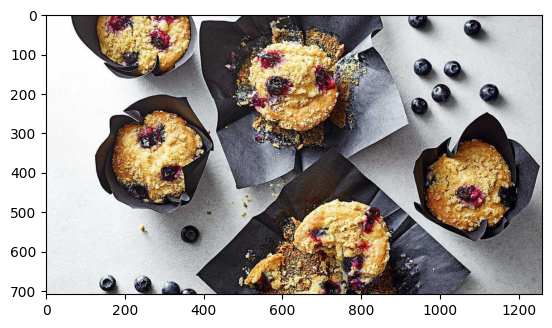

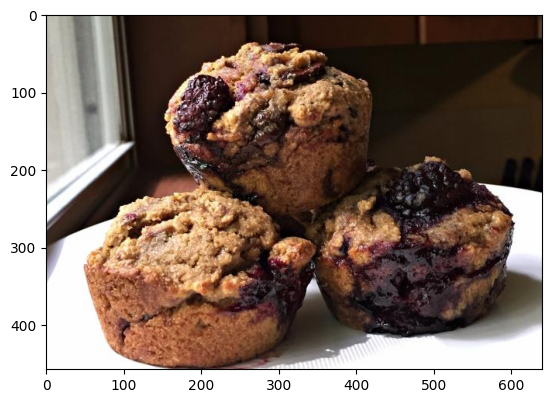

In [8]:
biggest_image = mpimg.imread(train_image_file_paths[4091])
plt.show()
plt.imshow(biggest_image)

smallest_image = mpimg.imread(train_image_file_paths[2586])
plt.show()
plt.imshow(smallest_image)

2024-03-27 23:09:16.534549: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-27 23:09:16.535236: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


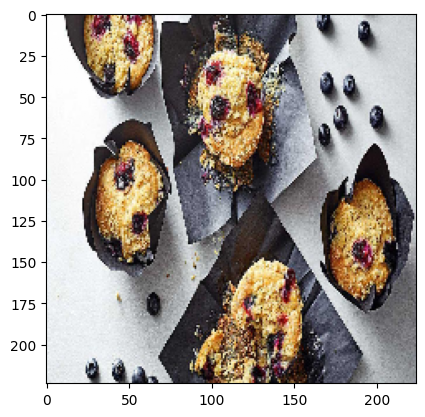

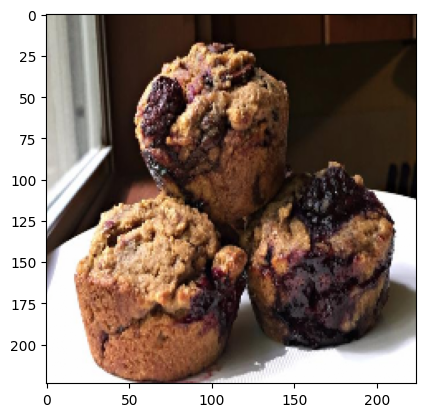

In [9]:
tensor_biggest_image_downscaled = tf.image.resize(
    images=biggest_image / 255.0,
    size=[224, 224],
    # method=tf.image.ResizeMethod.BILINEAR,
    # preserve_aspect_ratio=False,
    # antialias=False,
    # name=None
)

tensor_smallest_image_downscaled = tf.image.resize(
    images=smallest_image / 255.0,
    size=[224, 224]
)

plt.imshow(tensor_biggest_image_downscaled)
plt.show()

plt.imshow(tensor_smallest_image_downscaled)
plt.show()

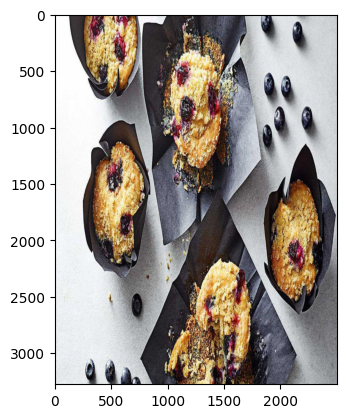

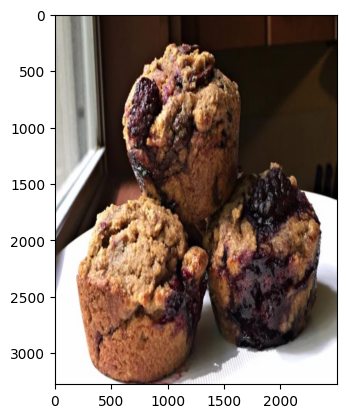

In [10]:
tensor_biggest_image_upscaled = tf.image.resize(
    images=biggest_image / 255.0,
    size=[3277, 2500]
)

tensor_smallest_image_upscaled = tf.image.resize(
    images=smallest_image / 255.0,
    size=[3277, 2500]
)

plt.imshow(tensor_biggest_image_upscaled)
plt.show()

plt.imshow(tensor_smallest_image_upscaled)
plt.show()


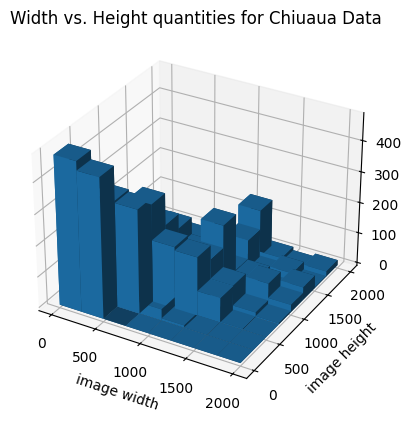

In [11]:
# https://stackoverflow.com/questions/52385299/plot-a-3d-bar-histogram

import numpy as np
import numpy.random
import matplotlib.pyplot as plt

# !pip install ipympl
# %matplotlib widget

# To generate some test data
# x = np.random.randn(500)
# y = np.random.randn(500)
x = [shape[0] for shape in img_shapes]
y = [shape[1] for shape in img_shapes]

XY = np.stack((x,y),axis=-1)

def selection(XY, limitXY=[[-2,+2],[-2,+2]]):
        XY_select = []
        for elt in XY:
            if elt[0] > limitXY[0][0] and elt[0] < limitXY[0][1] and elt[1] > limitXY[1][0] and elt[1] < limitXY[1][1]:
                XY_select.append(elt)

        return np.array(XY_select)

limitXY=[[0, 2000],[0, 2000]]
XY_select = selection(XY, limitXY=limitXY)


# xAmplitudes = np.array(XY_select)[:,0]#your data here
# yAmplitudes = np.array(XY_select)[:,1]#your other data here

# xAmplitudes = [shape[0] for shape in img_shapes]
# yAmplitudes = [shape[1] for shape in img_shapes]


fig = plt.figure() #create a canvas, tell matplotlib it's 3d
ax = fig.add_subplot(111, projection='3d')


hist, xedges, yedges = np.histogram2d(x, y, bins=(8,8), range =limitXY) # you can change your bins, and the range on which to take data
# hist is a 7X7 matrix, with the populations for each of the subspace parts.
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:]) -(xedges[1]-xedges[0])


xpos = xpos.flatten()*1./2
ypos = ypos.flatten()*1./2
zpos = np.zeros_like (xpos)

dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()

# cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!
# max_height = np.max(dz)   # get range of colorbars so we can normalize
# min_height = np.min(dz)
# # scale each z to [0,1], and get their rgb values
# rgba = [cmap((k-min_height)/max_height) for k in dz] 

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
plt.title("Width vs. Height quantities for Chiuaua Data")
plt.xlabel("image width")
plt.ylabel("image height")
# plt.savefig("Your_title_goes_here")
plt.show()


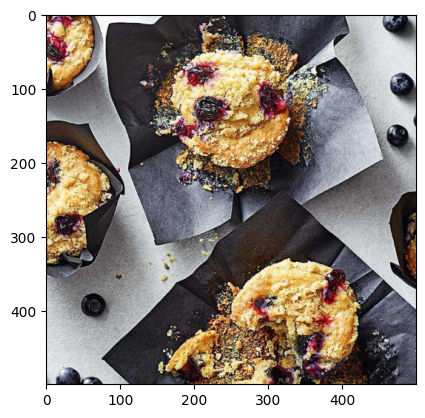

In [12]:
import tensorflow.keras.layers as layers

IMG_SIZE = 500

input_layer = tf.keras.Sequential([
	# layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3), name="input_layer"),
	layers.Resizing(
		IMG_SIZE, IMG_SIZE, 
		crop_to_aspect_ratio=True, 
		name="resize"
	),
	layers.Rescaling(1 / 255, name="rescale"),
], name="input_layer")

# input_layer.build()

input_image = input_layer(biggest_image)

input_image.shape, biggest_image.shape

plt.imshow(input_image)
plt.show()

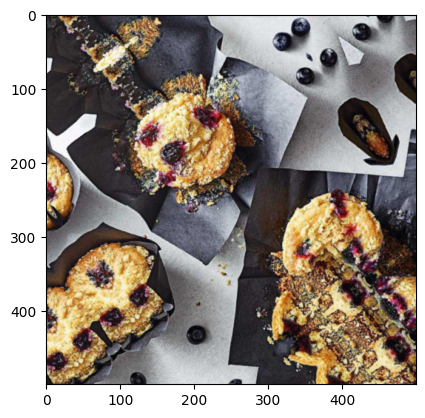

In [13]:
augmenting_layer = tf.keras.Sequential([
	layers.RandomFlip(0.5, name="flip"),
	layers.RandomZoom(0.5, name="zoom"),
	layers.RandomRotation(0.5, name="rotate")
], name="aug_layer")

# augmenting_layer.build()

augmented_image = augmenting_layer(input_image)

augmented_image.shape, input_image.shape

plt.imshow(augmented_image)
plt.show()

In [14]:
expanded_augmented_image = tf.expand_dims(augmented_image, 0)
expanded_augmented_image.shape

TensorShape([1, 500, 500, 3])

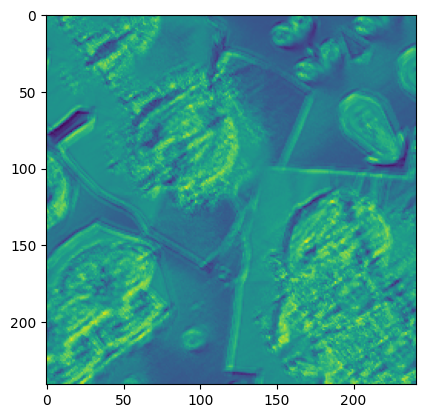

In [15]:
convolution_layer = tf.keras.Sequential([
	layers.Conv2D(filters=10, kernel_size=10, name="conv_1"),
	layers.Conv2D(filters=10, kernel_size=10, name="conv_2"),
	layers.MaxPool2D(name="pool"),
], name="conv_layer")

convoluted_image = convolution_layer(expanded_augmented_image)

convoluted_image.shape, augmented_image.shape

plt.imshow(tf.squeeze(convoluted_image)[:,:,0])
plt.show()

In [16]:
# inputs = layers.Input(shape=(500, 500, 3), name="input_layer")

model = tf.keras.Sequential()

model.add(input_layer)
model.add(augmenting_layer)
model.add(convolution_layer)
# x = layers.GlobalAveragePooling2D(name="global_average_pooling")(x)
model.add(layers.Flatten())
model.add(layers.Dense(1, activation="sigmoid", name="output_layer"))

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Sequential)        │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ aug_layer (Sequential)          │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer (Sequential)         │ ?                      │        13,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,020 (50.86 KB)

 Trainable params: 13,020 (50.86 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
	"train",
	label_mode="categorical",
	image_size=(IMG_SIZE, IMG_SIZE)
)
                                                                                
test_data = tf.keras.preprocessing.image_dataset_from_directory(
	"test",
	label_mode="categorical",
	image_size=(IMG_SIZE, IMG_SIZE),
	shuffle=False
)

Found 4733 files belonging to 2 classes.
Found 1184 files belonging to 2 classes.


In [18]:
# model.compile()

# # model.fit(train_data)
# # model.predict(train_data)

In [19]:
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(), # use Adam with default settings
              metrics=["accuracy"])

In [20]:
tf.config.list_physical_devices('GPU')

[]

In [21]:
print(tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
False


2024-03-27 23:09:18.924591: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-27 23:09:18.924674: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [22]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

['/device:CPU:0']


2024-03-27 23:09:18.986065: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-27 23:09:18.986137: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [25]:
# history = model.fit(
# 	train_data,
# 	# epochs=1, 
# 	# validation_data=test_data,
# 	# validation_steps=int(0.15 * len(test_data))
# )

In [26]:
model_2 = tf.keras.Sequential([
	layers.Resizing(
		IMG_SIZE, IMG_SIZE, 
		crop_to_aspect_ratio=True, 
		name="resize"
	),
	layers.Rescaling(1 / 255, name="rescale"),

	layers.RandomFlip(0.5, name="flip"),
	layers.RandomZoom(0.5, name="zoom"),
	layers.RandomRotation(0.5, name="rotate"),

	layers.Conv2D(filters=10, kernel_size=10, name="conv_1"),
	layers.Conv2D(filters=10, kernel_size=10, name="conv_2"),
	layers.MaxPool2D(name="pool"),

	layers.Flatten(),
	layers.Dense(2, activation="sigmoid")
], name="conv_layer")

model_2.compile(
	loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

history = model_2.fit(
	train_data,
	epochs=1, 
	validation_data=test_data,
	validation_steps=int(0.15 * len(test_data))
)


  7/148 ━━━━━━━━━━━━━━━━━━━━ 2:39 1s/step - accuracy: 0.4929 - loss: 40.6197

KeyboardInterrupt: 

In [ ]:
model_2.summary()

: 

In [ ]:
model_2.save("params.keras")

: 

In [ ]:
model_2.load_weights("params.keras")

: 

In [ ]:
model_2.predict(test_data)

: 